# Importing Libraries

In [14]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
import json
import os, glob
import re
from datetime import datetime
from pathlib import Path
import glob
import matplotlib
import matplotlib.pyplot as plt

In [15]:
# setting path
path= r'C:\Users\faisa\Desktop\Data analysis\Python Specialization\Achievement 2'

In [16]:
df = pd.read_csv("C:/Users/faisa/Desktop/Data analysis/Python Specialization/Achievement 2/02 Data/Updated Data/merged_df_weather.csv", index_col=False) 

In [17]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [18]:
# rename column
df = df.rename(columns={'avgTemp': 'temperature'})

In [19]:
# dropping column
df.drop(columns = {'_merge'}, inplace = True)

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,temperature
0,0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
1,1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1
2,2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6
3,3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
4,4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0


## 2. Daily temperature

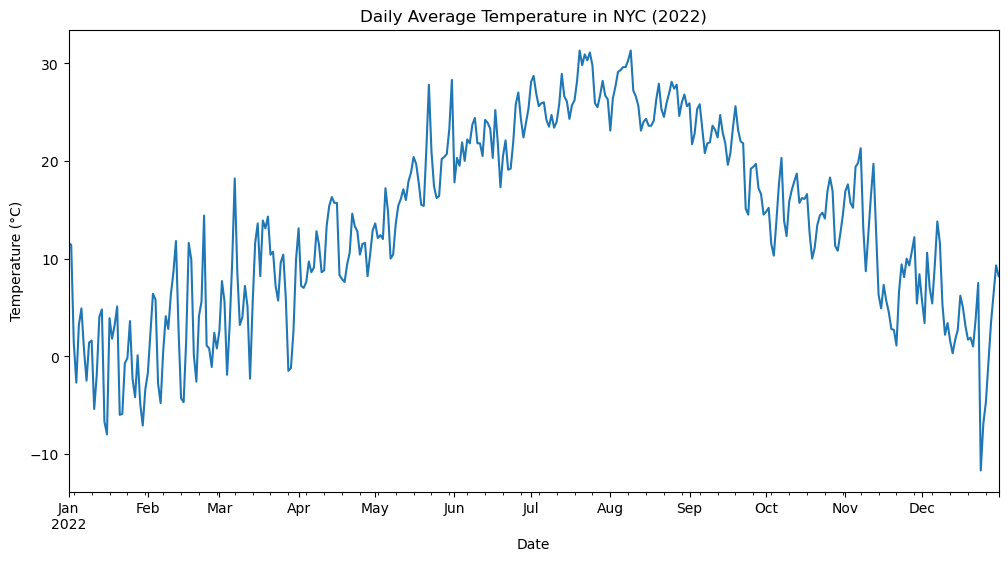

In [22]:
# Daily mean temperature
weather_daily = df.groupby("date")["temperature"].mean().reset_index()

# Plot with pandas (which uses Matplotlib under the hood)
weather_daily.plot(x="date", y="temperature", figsize=(12,6), legend=False)

plt.title("Daily Average Temperature in NYC (2022)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

## 3. Daily trips

In [23]:
# Count trips per day
trips_daily = df.groupby("date")["ride_id"].count().reset_index()
trips_daily = trips_daily.rename(columns={"ride_id": "trip_count"})

# Merge with weather data
daily = pd.merge(trips_daily, weather_daily, on="date")
daily.head()


,date,trip_count,temperature
0,2022-01-01,592,11.6
1,2022-01-02,1248,11.4
2,2022-01-03,832,1.4
3,2022-01-04,934,-2.7
4,2022-01-05,914,3.2


## 4. Dual Axis line chart

In [24]:
weather_daily.head()

,date,temperature
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


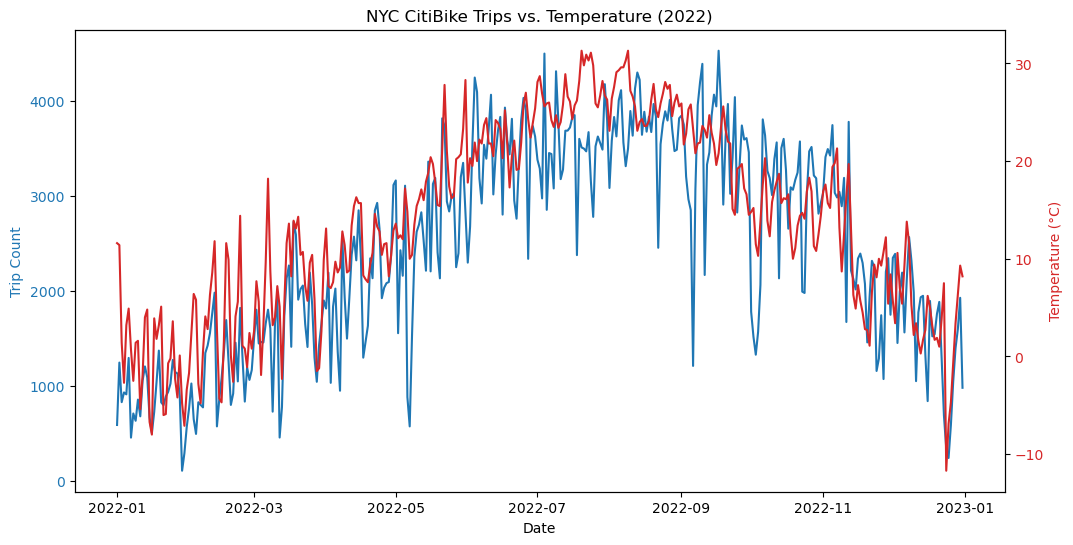

In [25]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot trip counts (left axis)
ax1.plot(daily["date"], daily["trip_count"], color="tab:blue", label="Trip Count")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis (right side)
ax2 = ax1.twinx()
ax2.plot(daily["date"], daily["temperature"], color="tab:red", label="Temperature (°C)")
ax2.set_ylabel("Temperature (°C)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("NYC CitiBike Trips vs. Temperature (2022)")
plt.show()


## Explanation: 
- I used pandas .plot function for the first chart of daily temperatures. Pandas integrates with Matplotlib, which makes it quick to produce time series plots.
- For the dual-axis, I used the Matplotlib object-oriented interface. This way I could:  
- plot trip counts with one y-axis.  
- creates a second y-axis to plot temperature on x-axis.